<a href="https://colab.research.google.com/github/sharksurfauto-byte/GGC-Machine-Learning-Workshop-25/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()
# print(df)

dataset = pd.DataFrame(df.data, columns = df.feature_names)
# dataset.head()


In [ ]:
dataset['Target'] = df.target
# dataset.head(10)

In [ ]:
#Checking is the dataset is balanced:

dataset['Target'].value_counts()

#The dataset is pretty balanced as the difference between true and false is not that much

,count
Target,
1,357
0,212


In [ ]:
#Train test split:

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,y,train_size = 80, random_state = 42)

#Defining params for the Model. C and max_iter are the most imp.

params = {'C': [1,5,10], 'max_iter' : [100,150]}

#import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg1 = LogisticRegression(C=100, max_iter=100)
model = GridSearchCV(log_reg1,param_grid=params, scoring = 'f1', cv=5)

model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid={'C': [1, 5, 10], 'max_iter': [100, 150]},
             scoring='f1')

In [ ]:
model.best_params_

{'C': 10, 'max_iter': 150}

In [ ]:
print(model.best_score_)

0.962524824438818


In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0
 1 1 1 1 0 1]


In [ ]:
#Model Evaluation:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[26  3]
 [ 3 48]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.925


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.94      0.94      0.94        51

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



### Visualizing Model Evaluation

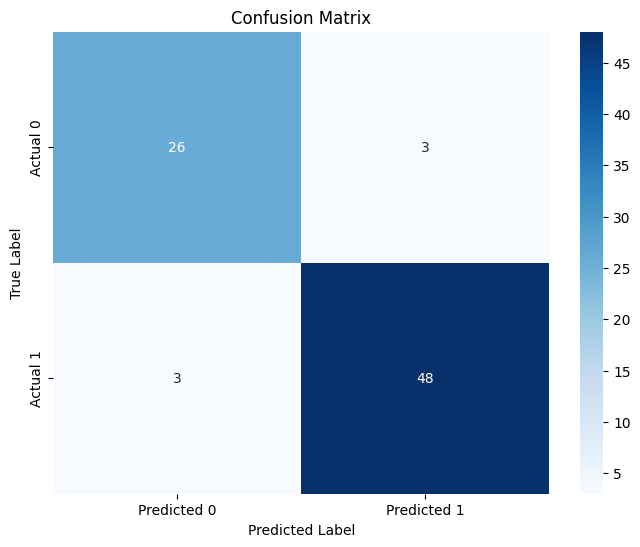

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Improving Model's Performance using Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#convert scaled arrays back to DataFrame with original column names

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

display(x_train_scaled.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.466014,-0.171297,-0.444349,-0.496417,0.223545,0.010714,-0.121752,-0.282889,0.384128,0.108598,...,-0.268452,-0.191281,-0.335202,-0.360928,0.428163,-0.123751,-0.041135,-0.205489,0.154332,0.182817
1,1.398621,0.478021,1.330963,1.416737,-0.462715,-0.043523,0.227068,0.781553,-0.842897,-1.200703,...,1.782736,0.133941,1.747903,1.763004,-0.596371,-0.150281,-0.033549,0.967113,-0.590728,-1.022294
2,0.395695,0.039551,0.416370,0.291751,0.909086,0.319304,0.708800,0.816605,0.405592,-0.719765,...,0.621295,0.036709,0.525178,0.493758,0.955819,-0.113644,0.489911,0.550491,-0.130497,-0.224835
3,-0.486188,-0.391730,-0.428480,-0.538039,0.636305,0.493236,-0.154699,-0.546293,-0.023688,1.155177,...,-0.701919,-0.481299,-0.527260,-0.650709,0.533694,0.034797,-0.168207,-0.626657,-0.582682,0.522434
4,-0.734038,-1.168036,-0.713298,-0.729620,0.237184,0.126669,-0.280000,-0.599128,0.001353,0.695773,...,-0.830507,-1.022777,-0.850238,-0.754394,0.071994,-0.287984,-0.455541,-0.695134,-0.947971,-0.160704


In [ ]:
params_scaled = {'C': [1,5,10], 'max_iter': [100,150,200,300,500]}

log_reg2 = LogisticRegression(C=100, max_iter = 100)
model_scaled = GridSearchCV(log_reg2, param_grid = params_scaled, scoring = 'f1', cv=5)

model_scaled.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid={'C': [1, 5, 10],
                         'max_iter': [100, 150, 200, 300, 500]},
             scoring='f1')

In [ ]:
print(model_scaled.best_params_)
print(model_scaled.best_score_)

{'C': 1, 'max_iter': 100}
0.9807168408826945


In [ ]:
y_pred_scaled = model_scaled.predict(x_test_scaled)

print("\nConfusion Matrix after scaling:\n", confusion_matrix(y_pred_scaled, y_test))
print("\nAccuracy Score after scaling:", accuracy_score(y_pred_scaled, y_test))
print("\nClassification Report after scaling:\n", classification_report(y_pred_scaled, y_test))


Confusion Matrix after scaling:
 [[28  2]
 [ 1 49]]

Accuracy Score after scaling: 0.9625

Classification Report after scaling:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.96      0.98      0.97        50

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

